# Traffic Sign Classification with Keras and CNN

Use the German Traffic Sign dataset to classify traffic sign images.

## Load the data 

In [1]:
import pickle
from pathlib import Path
import numpy as np
import math
import csv

training_file = '/data/traffic-signs-data/train.p'
validation_file = '/data/traffic-signs-data/valid.p' 
testing_file = '/data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

#load mappings from label number to label name
signNames = {}
with open('/data/traffic-signs-data/sign_names.csv') as csvfile:
     reader = csv.DictReader(csvfile)
     for row in reader:
         signNames[row['ClassId']]=row['SignName']
 

## Data Set Exploration

### Basic statistics

In [2]:
n_train = len(x_train)
n_validation = len(x_valid)
n_test = len(x_test)

image_shape = x_train[0].shape

# Number of unique labels/classes
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Detailed Date Set Exploration

Explore the data as you see fit. 

Try to answer questions like:
* is there a skew in class distribution?
* what do images look like?
* do you notice anything peculiar with the data?

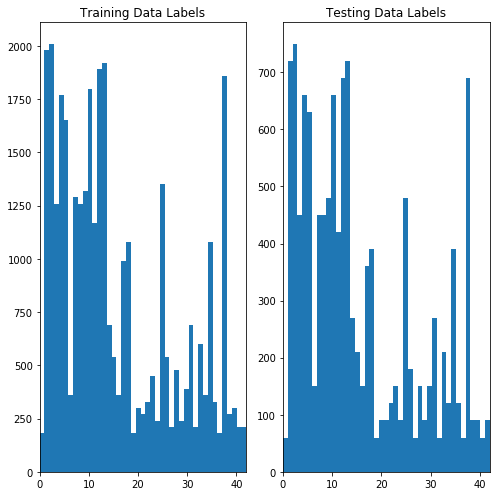

In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)

#visualize label distribution
plt.subplot(1,2,1).hist(y_train,43);
plt.xlim(0,42)
plt.title('Training Data Labels');
plt.subplot(1,2,2).hist(y_test,43);
plt.title('Testing Data Labels');
plt.xlim(0,42)
plt.tight_layout();

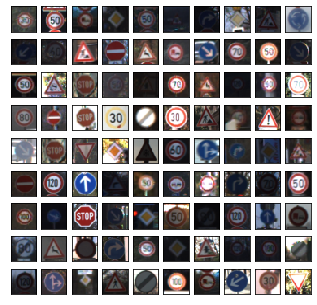

In [4]:
#visualize training data images
plt.subplots_adjust(hspace=0.1, wspace=0.1, bottom=0.1)

def get_random_images(images, how_many):
     rnd = random.sample(range(len(x_train)), how_many)
     return images[rnd]   

def plot_images(images, rows, cols):
    """Samples images randomly"""
    gs = gridspec.GridSpec(rows, cols, top=1.0, bottom=.0, right=.7, left=0., hspace=0.3,
                           wspace=0.1)

    for index, g in enumerate(gs):
        ax = plt.subplot(g)
        img = images[index]
        ax.imshow(img)
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
plot_images(get_random_images(x_train, 90), 9, 10)

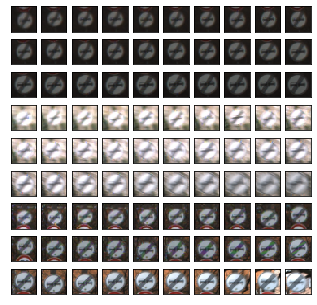

In [5]:
# visualize consecutive training data images
# visualize consecutive testing data images

# let's also display some consecutive images
plot_images(x_train, 9,10)

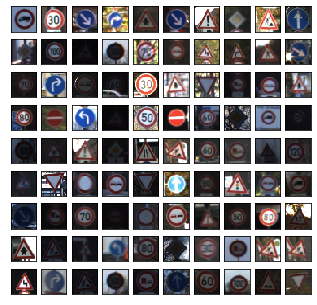

In [6]:
plot_images(x_test, 9,10)

## Define Model Architecture

### Pre Process the Dataset

In [7]:
# do you recall the pre-processing we did for mnist?
# do we need to do something similar here?


def normalizeImages(images):
    images = images.astype('float32')
    images /= 255
    return images

X_train = normalizeImages(x_train)
X_test = normalizeImages(x_test)

# convert labels to vectors using one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

print("Training images:", X_train.shape, " labels:", Y_train.shape)
print("Testing images:", X_test.shape, " labels:", Y_test.shape)

Training images: (34799, 32, 32, 3)  labels: (34799, 43)
Testing images: (12630, 32, 32, 3)  labels: (12630, 43)


### Create the Model

Try to build the building blocks you learned about.

Convolution 2D layers, Activations, Pooling Layers, Dropout

At the end use a couple of Dense Layers

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Dense, Convolution2D, ReLU, MaxPooling2D, Flatten, Dropout, Activation 
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

img_rows = X_train.shape[1]
img_cols = X_train.shape[2]

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols,3), name='Conv1'))
model.add(ReLU())
model.add(Convolution2D(32, (3, 3), name='Conv2'))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), name="MaxPool1"))
model.add(Dropout(0.5, name="Dropout_0.5_1"))

model.add(Convolution2D(64, (3, 3), padding='same', name='Conv3'))
model.add(ReLU())
model.add(Convolution2D(64, (3, 3), name='Conv4'))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), name="MaxPool2"))
model.add(Dropout(0.5, name="Dropout_0.5_2"))

model.add(Flatten(name="Flatten"))
model.add(Dense(512, name="Dense512"))
model.add(ReLU())
model.add(Dropout(0.5, name="Dropout_0.5_3"))
model.add(Dense(n_classes, name="Output"))
model.add(Activation("softmax"))

model.summary()

W0120 19:34:05.919802 139840078595904 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 28, 28, 32)        9248      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 32)        0         
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
Dropout_0.5_1 (Dropout)      (None, 14, 14, 32)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 14, 14, 64)        1

### Train, Validate and Test

In [9]:
#this is very similar to Hand Written Digit recognition example. It is important to use aacuracy as a metric for
#classification problems

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Instead of using fit like we did for Hand Written Recognition, we are using fit_generator. 
#HOMEWORK - Read Keras documentation to learn about the difference between fit and fit_generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Questions: What are the benefits of using an image generator vs passing the images directly?

#Note: Treat ML training as a series of experiments you need to run and try to figure out what works 
#for the type of problem you are trying to solve. That is the only way I know of that will help you develop 
#the intuition and expertise necessary to solve real ML problems. 
#I have seen articles that said image processing made the algorithm worse for certain problems 
#LESSON - Experiment to figure out what works for you!
img_generator = ImageDataGenerator(
	rotation_range=10,
	zoom_range=0.15,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.15,
	horizontal_flip=False,
	vertical_flip=False,
	fill_mode="nearest")

# Training the model
batch_size = 64
epochs = 30
history = model.fit_generator(
	img_generator.flow(X_train, Y_train, batch_size=batch_size),
	validation_data=(X_test, Y_test),
	steps_per_epoch=X_train.shape[0] // batch_size,
	epochs=epochs,
	verbose=1)

print("Saving the model at /models/traffic_signs.h5")
model.save("/models/traffic_signs.h5")

Epoch 1/30
543/543 [==============================] - 43s 79ms/step - loss: 2.2353 - acc: 0.3432 - val_loss: 1.0929 - val_acc: 0.6341
Epoch 2/30
543/543 [==============================] - 42s 76ms/step - loss: 0.9907 - acc: 0.6816 - val_loss: 0.4088 - val_acc: 0.8887
Epoch 3/30
543/543 [==============================] - 42s 77ms/step - loss: 0.5803 - acc: 0.8119 - val_loss: 0.2756 - val_acc: 0.9222
Epoch 4/30
543/543 [==============================] - 42s 77ms/step - loss: 0.4159 - acc: 0.8656 - val_loss: 0.2228 - val_acc: 0.9391
Epoch 5/30
543/543 [==============================] - 42s 77ms/step - loss: 0.3277 - acc: 0.8951 - val_loss: 0.2063 - val_acc: 0.9439
Epoch 6/30
543/543 [==============================] - 42s 77ms/step - loss: 0.2672 - acc: 0.9130 - val_loss: 0.1440 - val_acc: 0.9594
Epoch 7/30
543/543 [==============================] - 42s 77ms/step - loss: 0.2337 - acc: 0.9260 - val_loss: 0.1456 - val_acc: 0.9581
Epoch 8/30
543/543 [==============================] - 42s 77ms

### Plot Training Loss and Accuracy

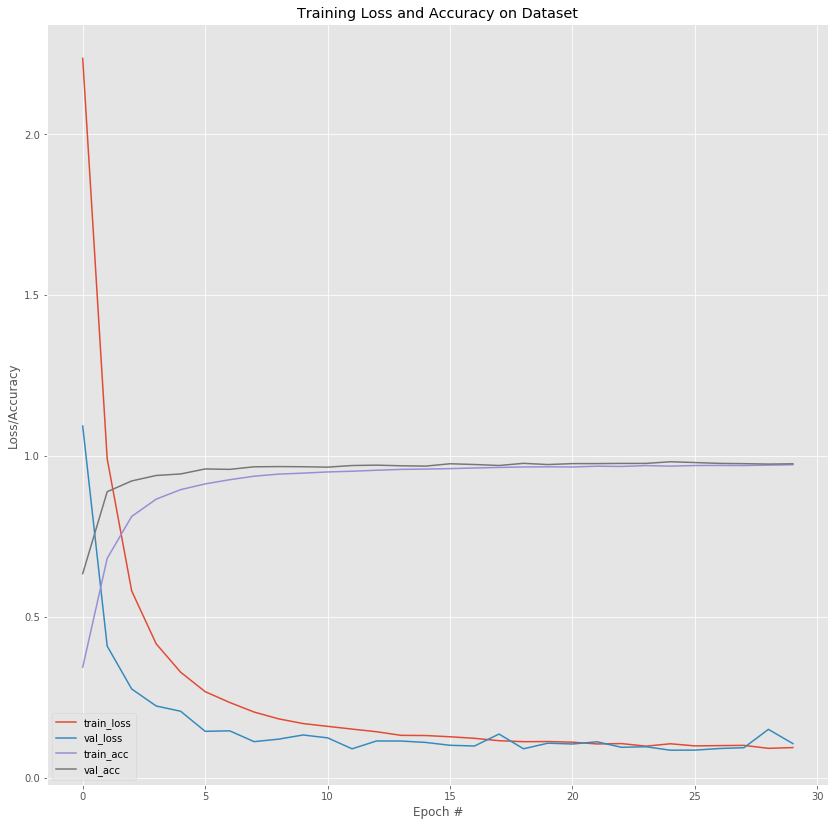

In [16]:
plt.rcParams['figure.figsize'] = (14,14)
range = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(range, history.history["loss"], label="train_loss")
plt.plot(range, history.history["val_loss"], label="val_loss")
plt.plot(range, history.history["acc"], label="train_acc")
plt.plot(range, history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


### Predictions

In [29]:
#classification report prints useful metric that shows how model predicts
from sklearn.metrics import classification_report

predictions = model.predict(X_test, batch_size=batch_size)
predicted_labels = np.argmax(predictions,axis=1)

print(classification_report(Y_test.argmax(axis=1),
	predicted_labels, target_names=signNames.values()))


                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00        60
                              Speed limit (30km/h)       0.99      1.00      1.00       720
                              Speed limit (50km/h)       0.99      0.99      0.99       750
                              Speed limit (60km/h)       1.00      0.94      0.96       450
                              Speed limit (70km/h)       1.00      0.99      0.99       660
                              Speed limit (80km/h)       0.94      0.98      0.96       630
                       End of speed limit (80km/h)       0.99      0.98      0.99       150
                             Speed limit (100km/h)       0.98      0.99      0.98       450
                             Speed limit (120km/h)       0.97      0.99      0.98       450
                                        No passing       1.00      1.00      1.

In [31]:
#Another way of printing accuracy
score = model.evaluate(X_test, Y_test, verbose=0)
accuracy = score[1]*100
print('Test data accuracy:', accuracy,'%')

Test data accuracy: 97.54552841186523 %


### Things to do

Start with this model as your baseline and try to improve the performance.
Experiment with the following:
 - train the model both using CPU (e.g. on your laptop) and GPU. Does the GPU make a difference?
 - different models - does adding layers help, what about different Conv2D kernels?
 - we noticed that some classes have much more training examples than others? Does it help if we try to feed the model roughly the same number of examples for each class? How would you do that?
 - experiment with different parameters in the image generator? Does it even make a difference?
 - some images are hard to see even for humans. Experiment with a technique called Contrast Limited Adaptive Histogram Equalization. Does it make a difference?
 - use the model we saved to make predictions in a browser
 
 
 Note: To use CLAHE use the following (you will probably have to pip install this and rebuild the image):
 from skimage import exposure
 transformed_image = exposure.equalize_adapthist(image, clip_limit=0.1)